In [ ]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler
import torch.optim as optim
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 15448552.59it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 228519.37it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4163118.99it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21592276.99it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


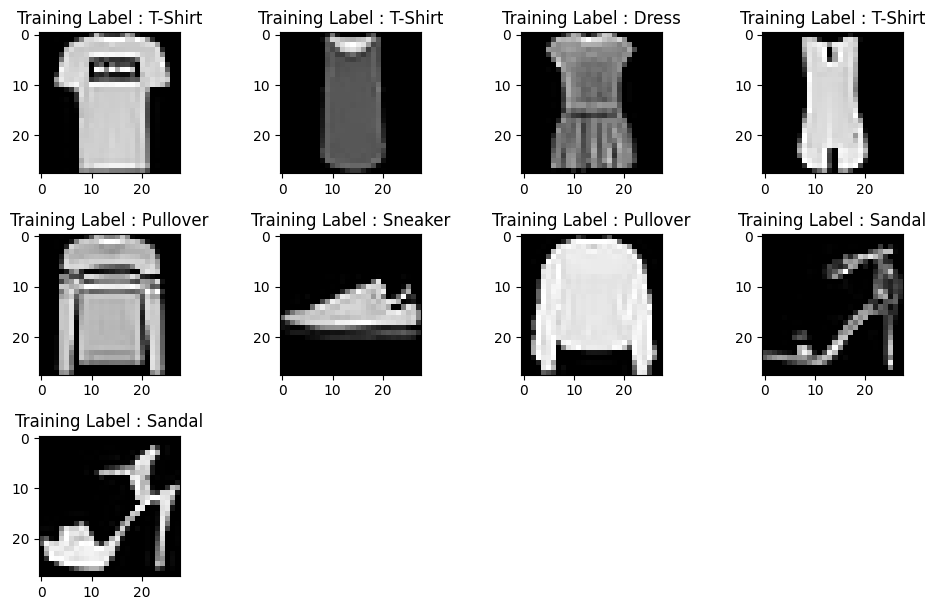

In [ ]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [ ]:
input_size = 784
out_size = 10

In [ ]:
## Define the model
################ Your code ############
model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 10),
torch.nn.LogSoftmax(dim=1)

)
#######################################

In [ ]:
################ Your code ############

criterion = torch.nn.CrossEntropyLoss()
optimizer =optim.SGD( model.parameters(), lr=0.01)
#######################################

In [ ]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)


In [ ]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.8560508442903633
Training loss: 0.5044594771349862
Training loss: 0.44918196989910436
Training loss: 0.4206456412066783
Training loss: 0.3977374422715417
Training loss: 0.3800570845508626
Training loss: 0.366297971298382
Training loss: 0.3544817923514574
Training loss: 0.3439014357750985
Training loss: 0.33598344733338875


In [ ]:
!pip install --upgrade d2l==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00


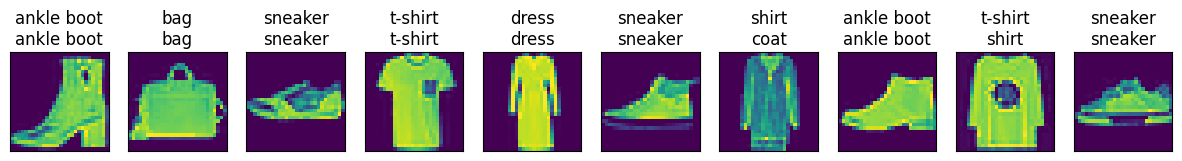

In [ ]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

## Part b

In [ ]:
for e in range(20):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.3274060329839365
Training loss: 0.32037154740806834
Training loss: 0.31259099712599314
Training loss: 0.30608119631309244
Training loss: 0.299453329144002
Training loss: 0.2942168845503188
Training loss: 0.2865918710240042
Training loss: 0.2819720262816466
Training loss: 0.2774755808828609
Training loss: 0.27226905991782
Training loss: 0.2671847460287085
Training loss: 0.2627233070954839
Training loss: 0.25776178839364283
Training loss: 0.25425031764516187
Training loss: 0.24930523992029588
Training loss: 0.24509583607411334
Training loss: 0.2415058964065143
Training loss: 0.237678896667543
Training loss: 0.23365859341011372
Training loss: 0.23062712285341994


In [ ]:
model_overfit = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 1024),
torch.nn.ReLU(),
torch.nn.Linear(1024, 512),
torch.nn.ReLU(),
torch.nn.Linear(512, 10),
torch.nn.LogSoftmax(dim=1)

)
print(model_overfit)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): ReLU()
  (3): Linear(in_features=1024, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
  (6): LogSoftmax(dim=1)
)


Training loss: 0.7753133007776
Test loss: 0.5539162755012512
Training loss: 0.48380403546318573
Test loss: 0.4710856080055237
Training loss: 0.43136277969585046
Test loss: 0.48374736309051514
Training loss: 0.3976147750547446
Test loss: 0.45399612188339233
Training loss: 0.37483903565513554
Test loss: 0.5012974143028259
Training loss: 0.3579480283137069
Test loss: 0.40543121099472046
Training loss: 0.3425821825655412
Test loss: 0.38547560572624207
Training loss: 0.3304684466358695
Test loss: 0.36737897992134094
Training loss: 0.3205543639563294
Test loss: 0.3801320791244507
Training loss: 0.30833137377715314
Test loss: 0.360708087682724
Training loss: 0.2986743783455159
Test loss: 0.36009564995765686
Training loss: 0.29035629143815306
Test loss: 0.36532992124557495
Training loss: 0.2821825325314297
Test loss: 0.35132309794425964
Training loss: 0.2752567075812486
Test loss: 0.34502559900283813
Training loss: 0.2681138170664626
Test loss: 0.3404284119606018
Training loss: 0.2604356225429

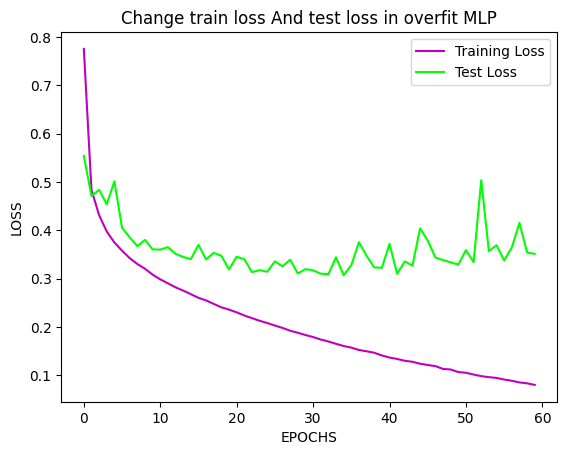

In [ ]:


criterion = torch.nn.CrossEntropyLoss()
optimizer =optim.SGD(model_overfit.parameters(), lr=0.01)

train_losses = []
test_losses = []

for e in range(60):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model_overfit(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model_overfit.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model_overfit(images)
            test_loss += criterion(log_ps, labels)

    test_losses.append(test_loss / len(testloader))

    print(f"Test loss: {test_loss/len(testloader)}")
    model_overfit.train()


plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('Change train loss And test loss in overfit MLP')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()



## Part c

Training loss: 0.7132520186685042
Test loss: 0.4222601652145386
Training loss: 0.5388090954914785
Test loss: 0.4130410850048065
Training loss: 0.49499903435010645
Test loss: 0.3853286802768707
Training loss: 0.46803387132153584
Test loss: 0.382962167263031
Training loss: 0.45008008801606675
Test loss: 0.39085498452186584
Training loss: 0.43799059331289997
Test loss: 0.3622870445251465
Training loss: 0.42604483249408603
Test loss: 0.37739989161491394
Training loss: 0.41540036974812367
Test loss: 0.3546847701072693
Training loss: 0.4095068276881663
Test loss: 0.3808952271938324
Training loss: 0.40453605194971254
Test loss: 0.3537795841693878
Training loss: 0.39625286485658273
Test loss: 0.3497578203678131
Training loss: 0.3935129884590726
Test loss: 0.37532514333724976
Training loss: 0.38665436169327194
Test loss: 0.3554513156414032
Training loss: 0.3792987119541494
Test loss: 0.34840911626815796
Training loss: 0.37832539079031713
Test loss: 0.3645964562892914
Training loss: 0.3731845501

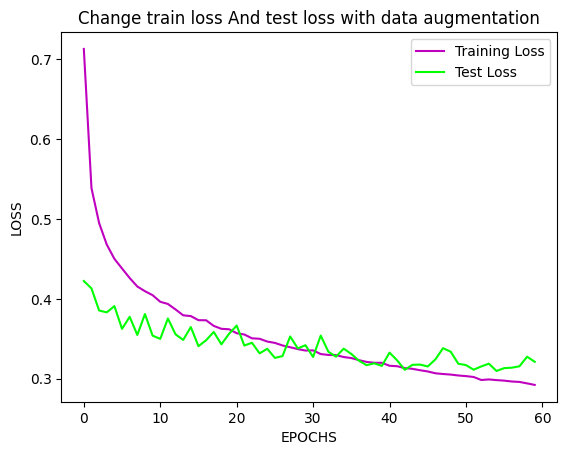

In [ ]:

import torchvision.transforms as transforms
transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = FashionMNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

train_losses = []
test_losses = []


for e in range(60):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model_overfit(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")


    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model_overfit.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model_overfit(images)
            test_loss += criterion(log_ps, labels)

    test_losses.append(test_loss / len(testloader))
    print(f"Test loss: {test_loss/len(testloader)}")

    model_overfit.train()


plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('Change train loss And test loss with data augmentation')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()


# Part D

Training loss: 1.5083969020640164
Test loss: 0.989555299282074
Training loss: 0.844189427808912
Test loss: 0.785539448261261
Training loss: 0.7098805172039248
Test loss: 0.6925791501998901
Training loss: 0.6380468565644994
Test loss: 0.6159256100654602
Training loss: 0.5959654883789355
Test loss: 0.5983453989028931
Training loss: 0.5688886187478169
Test loss: 0.5752919912338257
Training loss: 0.5513158866019645
Test loss: 0.5542334318161011
Training loss: 0.5373411588609092
Test loss: 0.6111608743667603
Training loss: 0.5278306998677854
Test loss: 0.5321618318557739
Training loss: 0.5184118428241724
Test loss: 0.5200819969177246
Training loss: 0.5079155385271826
Test loss: 0.5133064985275269
Training loss: 0.499855740841772
Test loss: 0.5074336528778076
Training loss: 0.49117783244167057
Test loss: 0.49230748414993286
Training loss: 0.48510516403135717
Test loss: 0.49947062134742737
Training loss: 0.47615132283872125
Test loss: 0.49958324432373047
Training loss: 0.47024446014148086
Tes

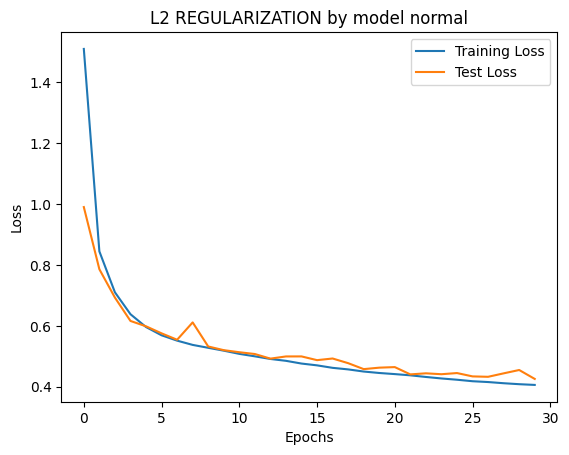

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt




model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 10),
torch.nn.LogSoftmax(dim=1)

)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)
train_losses = []
test_losses = []


for e in range(30):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)

    test_losses.append(test_loss / len(testloader))

    print(f"Test loss: {test_loss/len(testloader)}")
    model.train()

# _________________________________________________________________________________
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.title('L2 REGULARIZATION by model normal')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Training loss: 1.4048298995123742
Test loss: 0.9169262051582336
Training loss: 0.8041940576104976
Test loss: 0.7204080820083618
Training loss: 0.6739485429357618
Test loss: 0.6340728402137756
Training loss: 0.6095612460552756
Test loss: 0.5989322662353516
Training loss: 0.572465586986369
Test loss: 0.561090886592865
Training loss: 0.5482378151180394
Test loss: 0.5384712815284729
Training loss: 0.530355462133249
Test loss: 0.5311512351036072
Training loss: 0.5161458946494405
Test loss: 0.5187180638313293
Training loss: 0.5038713447288918
Test loss: 0.506054699420929
Training loss: 0.4934544664646771
Test loss: 0.4993096590042114
Training loss: 0.4846244081060515
Test loss: 0.5091261267662048
Training loss: 0.47437370366760406
Test loss: 0.47184300422668457
Training loss: 0.4670277145752775
Test loss: 0.4927126169204712
Training loss: 0.4584847922836031
Test loss: 0.46911299228668213
Training loss: 0.4500412127769578
Test loss: 0.45807430148124695
Training loss: 0.44457480705369
Test los

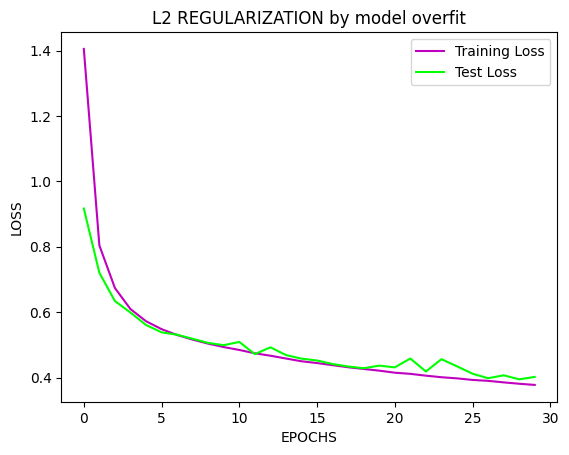

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt




model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 1024),
torch.nn.ReLU(),
torch.nn.Linear(1024, 512),
torch.nn.ReLU(),
torch.nn.Linear(512, 10),
torch.nn.LogSoftmax(dim=1)

)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)
train_losses = []
test_losses = []


for e in range(30):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)

    test_losses.append(test_loss / len(testloader))

    print(f"Test loss: {test_loss/len(testloader)}")
    model.train()





# _________________________________________________________________________________
plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('L2 REGULARIZATION by model overfit')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()


Training loss: 1.6998573354820707
Test loss: 1.2267935276031494
Training loss: 1.084792940601357
Test loss: 0.9660268425941467
Training loss: 0.8851449486416286
Test loss: 0.8345997929573059
Training loss: 0.779533635864634
Test loss: 0.7432805895805359
Training loss: 0.7193491385499043
Test loss: 0.7094112038612366
Training loss: 0.6833779191983534
Test loss: 0.6714866161346436
Training loss: 0.6613734502718647
Test loss: 0.6954870223999023
Training loss: 0.6439349380637537
Test loss: 0.6287742257118225
Training loss: 0.6289347544280705
Test loss: 0.626274585723877
Training loss: 0.6187362064049442
Test loss: 0.6302699446678162
Training loss: 0.6089395559164507
Test loss: 0.6107931137084961
Training loss: 0.5995989687153017
Test loss: 0.6138830184936523
Training loss: 0.5895996549045608
Test loss: 0.5910477638244629
Training loss: 0.5792041953120913
Test loss: 0.5734689235687256
Training loss: 0.5701898055544286
Test loss: 0.5754083395004272
Training loss: 0.5636360890575564
Test loss

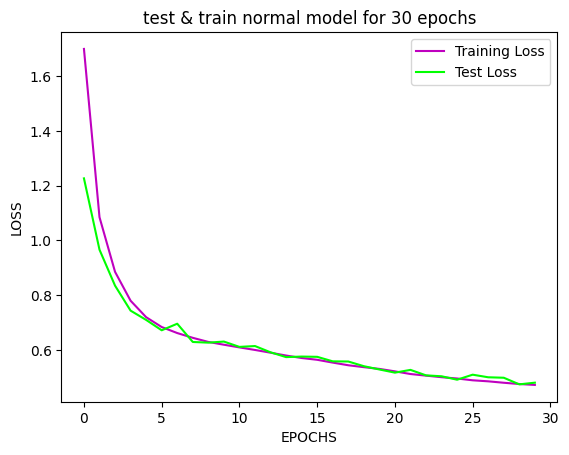

In [ ]:
model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 10),
torch.nn.LogSoftmax(dim=1)

)

criterion = torch.nn.CrossEntropyLoss()
optimizer =optim.SGD(model.parameters(), lr=0.01)

train_losses = []
test_losses = []

for e in range(30):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)

    test_losses.append(test_loss / len(testloader))

    print(f"Test loss: {test_loss/len(testloader)}")
    model.train()


plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('test & train normal model for 30 epochs')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()




#Part E

combination of dropout & L2

Training loss: 1.6702543955876121
Test loss: 0.4307114779949188
Training loss: 1.0155730032717496
Test loss: 0.33573102951049805
Training loss: 0.8484477212688307
Test loss: 0.28973907232284546
Training loss: 0.7590272946080674
Test loss: 0.2637755870819092
Training loss: 0.7005434503941648
Test loss: 0.2447761744260788
Training loss: 0.6565449945390351
Test loss: 0.23557732999324799
Training loss: 0.6277530384915215
Test loss: 0.22522160410881042
Training loss: 0.6040513053504643
Test loss: 0.21661411225795746
Training loss: 0.5836389132145879
Test loss: 0.21016597747802734
Training loss: 0.5673223748517189
Test loss: 0.20468556880950928
Training loss: 0.5526147950559791
Test loss: 0.2009771168231964
Training loss: 0.5447706232256473
Test loss: 0.19813333451747894
Training loss: 0.533111512311486
Test loss: 0.19323378801345825
Training loss: 0.5234897715895415
Test loss: 0.19216127693653107
Training loss: 0.514651187685634
Test loss: 0.1886196732521057
Training loss: 0.509597227644564

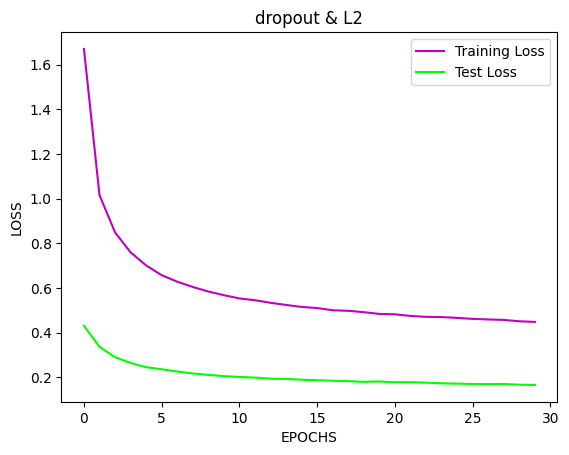

In [25]:
model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 128),

torch.nn.ReLU(),
nn.Dropout(0.4),
torch.nn.Linear(128, 128),
torch.nn.ReLU(),
torch.nn.Linear(128, 10),
torch.nn.LogSoftmax(dim=1)

)

criterion = torch.nn.CrossEntropyLoss()
optimizer =optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)

train_losses = []
test_losses = []

for e in range(30):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")

    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += (criterion(log_ps, labels))*0.4

    test_losses.append(test_loss / len(testloader))

    print(f"Test loss: {test_loss/len(testloader)}")
    model.train()


plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('dropout & L2')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()




data augmmentation & L2

Training loss: 1.582821623793543
Test loss: 1.0269278287887573
Training loss: 0.8861551597428474
Test loss: 0.7893434166908264
Training loss: 0.7367028896170639
Test loss: 0.6885758638381958
Training loss: 0.6583229394863918
Test loss: 0.6435306072235107
Training loss: 0.609755229339925
Test loss: 0.6159833669662476
Training loss: 0.5795500206985453
Test loss: 0.5692592263221741
Training loss: 0.5595749864128353
Test loss: 0.5624017119407654
Training loss: 0.5464875945595028
Test loss: 0.5429931282997131
Training loss: 0.5324073552386339
Test loss: 0.5344545841217041
Training loss: 0.5222243328910392
Test loss: 0.5220026969909668
Training loss: 0.512952335639549
Test loss: 0.5338281989097595
Training loss: 0.503204079801594
Test loss: 0.5056556463241577
Training loss: 0.4937270072413914
Test loss: 0.5127846002578735
Training loss: 0.4871153465148482
Test loss: 0.501268744468689
Training loss: 0.47950669732302237
Test loss: 0.5105271935462952
Training loss: 0.47283085116318296
Test loss

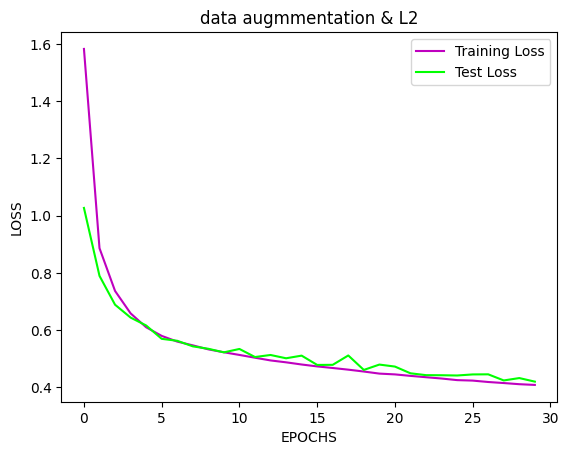

In [ ]:
	a = np.random.rand(5, 1)
	a.shape # (5, 1)
	a.T # != a which a.T.shape = (1,5)
	np.dot(a, a.T)# returns a matrix

dropout & dataaugmentation

Training loss: 1.6999695475803
Test loss: 0.43449708819389343
Training loss: 1.01780998033247
Test loss: 0.3349110782146454
Training loss: 0.8383059420946565
Test loss: 0.2890370488166809
Training loss: 0.7455336347635366
Test loss: 0.2626391053199768
Training loss: 0.6895940550990196
Test loss: 0.24994613230228424
Training loss: 0.6490026070301467
Test loss: 0.23181234300136566
Training loss: 0.6203114931453774
Test loss: 0.22150331735610962
Training loss: 0.5990142817499795
Test loss: 0.21627295017242432
Training loss: 0.5787865447083007
Test loss: 0.2109224647283554
Training loss: 0.5637006855754456
Test loss: 0.20283102989196777
Training loss: 0.550738225804209
Test loss: 0.20064310729503632
Training loss: 0.5379588293876729
Test loss: 0.19748863577842712
Training loss: 0.528860522930556
Test loss: 0.19500738382339478
Training loss: 0.5221851631395344
Test loss: 0.1895354986190796
Training loss: 0.5141589974225965
Test loss: 0.18637430667877197
Training loss: 0.5057983522825658
Tes

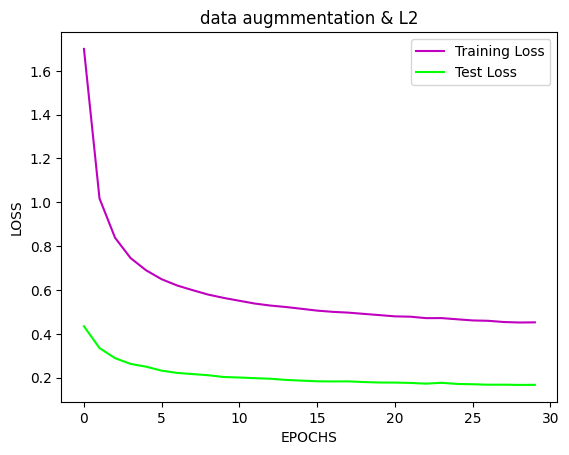

In [ ]:

import torchvision.transforms as transforms
model = nn.Sequential(
torch.nn.Flatten(),
torch.nn.Linear(784, 128),
torch.nn.ReLU(),
nn.Dropout(0.4),
torch.nn.Linear(128, 128),
torch.nn.ReLU(),

torch.nn.Linear(128, 10),
torch.nn.LogSoftmax(dim=1)

)



transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = FashionMNIST(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

criterion = torch.nn.CrossEntropyLoss()
optimizer =optim.SGD(model.parameters(), lr=0.01)

train_losses = []
test_losses = []


for e in range(30):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))
    print(f"Training loss: {running_loss/len(trainloader)}")


    test_loss = 0
    accuracy = 0
    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            log_ps = model(images)
            test_loss += (criterion(log_ps, labels))*0.4

    test_losses.append(test_loss / len(testloader))
    print(f"Test loss: {test_loss/len(testloader)}")

    model.train()


plt.plot(train_losses, label='Training Loss' , color='m')
plt.plot(test_losses, label='Test Loss' , color='#00FF00')
plt.legend()
plt.title('data augmmentation & L2')
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()
